# Тема “Обучение без учителя”

## Задание 1

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()

In [3]:
data = boston.data

In [4]:
target = boston.target

In [5]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
x = pd.DataFrame(data, columns=feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
y = pd.DataFrame(target, columns =['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
y_train.head(10)

,price
477,12.0
15,19.9
332,19.4
423,13.4
19,18.2
325,24.6
335,21.1
56,24.7
437,8.7
409,27.5


In [9]:
scaler = StandardScaler()

In [50]:
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000930,0.0,0.122593,0.0,0.257202,0.519219,0.836251,0.137921,0.173913,0.208015,0.425532,0.996470,0.201711
1,0.000533,0.4,0.210000,1.0,0.127572,0.588774,0.308960,0.268076,0.130435,0.127863,0.531915,1.000000,0.049669
2,0.001087,0.0,1.000000,0.0,0.460905,0.431157,0.987642,0.067155,0.130435,1.000000,0.797872,0.982879,0.450883
3,0.000928,0.0,0.372963,0.0,0.057613,0.447834,0.050463,0.378079,0.130435,0.225191,0.702128,0.984896,0.104581
4,0.057112,0.0,0.642963,0.0,0.674897,0.495017,0.915551,0.112632,1.000000,0.914122,0.808511,0.970220,0.428808
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.211336,0.0,0.642963,0.0,0.436214,0.155583,1.000000,0.038584,1.000000,0.914122,0.808511,0.071789,0.900662
98,0.161989,0.0,0.642963,0.0,0.730453,0.528371,0.930999,0.079386,1.000000,0.914122,0.808511,0.068511,0.450331
99,0.157830,0.0,0.642963,0.0,0.436214,0.568233,1.000000,0.036183,1.000000,0.914122,0.808511,0.087574,0.537804
100,0.000481,0.0,0.138889,0.0,0.131687,0.437665,0.434604,0.299866,0.086957,0.114504,0.627660,0.997705,0.307119


In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [49]:
x_train_tsne = tsne.fit_transform(x_train_scaled)
print('До:\t{}'.format(x_train_scaled.shape))
print('После:\t{}'.format(x_train_tsne.shape))
print(x_train_tsne)

До:	(404, 13)
После:	(404, 2)
[[ 1.81041489e+01  2.91841412e+01]
 [ 3.36446118e+00 -7.90966845e+00]
 [-2.07167511e+01 -8.94725513e+00]
 [ 2.76545868e+01  2.66364594e+01]
 [ 4.35941935e+00 -7.43922949e+00]
 [-1.18708668e+01 -3.19696522e+00]
 [-9.88421822e+00 -3.11915612e+00]
 [-2.67814331e+01 -1.50311155e+01]
 [ 2.85059834e+01  2.74729290e+01]
 [ 2.97867966e+01  2.44989853e+01]
 [-1.03291616e+01 -2.70374441e+00]
 [-6.06545353e+00 -9.15262985e+00]
 [-5.61790419e+00 -1.35841761e+01]
 [ 2.86210976e+01  2.46200790e+01]
 [-7.11505461e+00 -1.45416355e+01]
 [ 7.49843025e+00 -8.60527611e+00]
 [ 1.22831607e+00 -5.80473423e+00]
 [-2.18536625e+01 -8.58939934e+00]
 [-1.68641014e+01 -1.03258257e+01]
 [-1.86876888e+01 -6.71250486e+00]
 [ 2.41089859e+01  2.88961773e+01]
 [-7.64432192e-01 -5.37148428e+00]
 [-1.35651073e+01 -3.63450623e+00]
 [-8.29061127e+00 -4.92048645e+00]
 [-2.71355915e+01 -1.48728647e+01]
 [-6.49560738e+00 -1.29633284e+01]
 [-7.80653834e-01  8.48422623e+00]
 [-8.23790169e+00 -1.6771

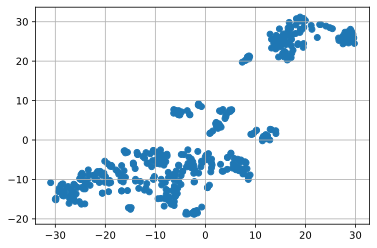

In [13]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])
plt.grid()
plt.show()

## Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.


In [14]:
first_k_means_model = KMeans(n_clusters=3, random_state=42, max_iter = 100)

In [21]:
train_my_model = first_k_means_model.fit_predict(x_train_scaled)
print(train_my_model)

[1 2 0 1 2 2 2 0 1 1 2 2 2 1 2 2 2 0 2 0 1 2 0 2 0 2 1 0 2 0 2 2 1 1 2 0 0
 2 2 0 0 2 1 2 1 1 2 2 1 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2
 2 2 0 2 1 1 1 1 0 2 1 1 1 0 1 2 2 1 1 0 0 2 1 1 2 1 2 0 0 0 2 2 0 2 2 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 1 1 0 0 1 0 2 2 2 2 1 2 0 2 1 2 1 2 2 2 1 2 2
 2 2 2 1 0 2 0 1 1 1 1 1 0 2 1 2 1 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 2 2 1 2 1
 1 0 0 1 1 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 0 2 2 2 2 0 2 1 2 1 0 1 2 1 1 1
 1 2 2 0 0 2 0 2 1 2 2 2 2 2 1 1 0 2 2 0 0 1 1 2 0 1 1 2 0 0 1 2 0 1 2 2 1
 2 1 2 2 0 2 2 2 2 2 2 0 1 2 1 2 2 0 2 1 1 0 1 2 1 2 2 1 0 0 2 1 0 1 1 1 2
 0 1 2 2 2 2 2 2 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 1 2 1 0 2 2 1 2 1
 1 2 2 1 0 2 2 0 2 2 2 1 2 2 2 2 1 2 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 0 1 0 1 2 1 0 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 2 0 2 2 2 0 1 2]


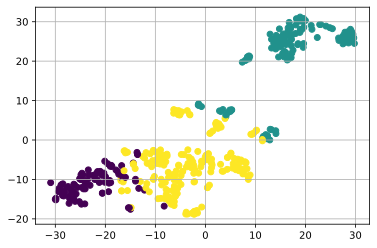

In [37]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=train_my_model)
plt.grid()
plt.show()

In [40]:
y_train[train_my_model==0].mean()

price    27.788372
dtype: float64

In [41]:
y_train[train_my_model==1].mean()

price    16.165354
dtype: float64

In [42]:
y_train[train_my_model==2].mean()

price    24.958115
dtype: float64

In [43]:
x_train.loc[train_my_model==0, 'CRIM'].mean()

0.07356558139534886

In [44]:
x_train.loc[train_my_model==1, 'CRIM'].mean()

10.797028425196853

In [45]:
x_train.loc[train_my_model==2, 'CRIM'].mean()

0.42166020942408367

Вывод: там, где жильё дешевле- больше криминальной активности.

## Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [56]:
test_labels = first_k_means_model.fit_predict(x_test_scaled)
print(test_labels)

[2 0 2 0 1 2 2 2 1 2 2 2 1 0 2 1 2 1 0 1 0 0 2 2 1 1 0 1 2 2 2 0 1 1 1 2 0
 0 2 0 2 0 0 0 0 1 2 0 1 0 2 0 2 2 0 1 1 0 0 0 0 0 0 0 0 2 1 0 0 1 0 1 1 0
 0 1 2 0 1 2 0 1 0 1 2 2 1 0 0 2 0 1 2 0 1 2 1 1 1 1 0 0]


In [58]:
x_test_tsne = tsne.fit_transform(x_test_scaled)

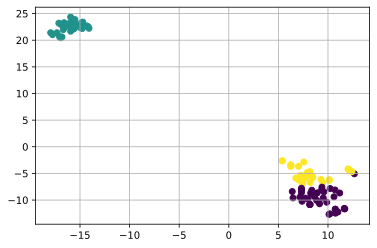

In [71]:
plt.scatter(x_test_tsne[:, 0], x_test_tsne[:, 1], c=test_labels)
plt.grid()
plt.show()

In [61]:
y_test[test_labels==0].mean()

price    26.741463
dtype: float64

In [62]:
y_test[test_labels==1].mean()

price    16.816129
dtype: float64

In [63]:
y_test[test_labels==2].mean()

price    19.136667
dtype: float64

In [65]:
x_test.loc[test_labels==0, 'CRIM'].mean()

0.12016536585365852

In [66]:
x_test.loc[test_labels==1, 'CRIM'].mean()

11.389174193548389

In [67]:
x_test.loc[test_labels==2, 'CRIM'].mean()

0.4121796666666666